In [ ]:
# 폰트 설치
!apt-get update -qq # 나눔고딕 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
# 여기까지 실행 후 "런타임 다시 시작..." 실행 (이 부분은 실행할 필요 없음)

In [ ]:
# 필요한 라이브러리 선언
from bs4 import BeautifulSoup 
import pandas as pd
import requests
import re
import sys
import pprint

In [ ]:
# '北, 美선호 싱가포르 수용한 까닭…장소보다 실리 택한 듯' 뉴스기사 댓글 리뷰 웹크롤링
# (과정1) - 주소 긁어오기
news_List = []
url="http://news.naver.com/main/hotissue/read.nhn?mid=hot&sid1=100&cid=1079165&iid=2780573&oid=001&aid=0010079145&ptype=052"

oid=url.split("oid=")[1].split("&")[0]
aid=url.split("aid=")[1]
page=1    
header = {
    "User-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36",
    "referer":url}

In [ ]:
# '北, 美선호 싱가포르 수용한 까닭…장소보다 실리 택한 듯' 뉴스기사 댓글 리뷰 웹크롤링
# (과정2) - 파싱 후 댓글을 리스트에 중첩(한번에 댓글이 20개씩 보임 --> 한 페이지씩 몽땅 댓글을 긁어옴)
while True :
    review_url="https://apis.naver.com/commentBox/cbox/web_neo_list_jsonp.json?ticket=news&templateId=default_society&pool=cbox5&_callback=jQuery1707138182064460843_1523512042464&lang=ko&country=&objectId=news"+oid+"%2C"+aid+"&categoryId=&pageSize=20&indexSize=10&groupId=&listType=OBJECT&pageType=more&page="+str(page)+"&refresh=false&sort=FAVORITE" 

    r = requests.get(review_url,headers=header)
    cont = BeautifulSoup(r.content,"html.parser")    
    total_comm = str(cont).split('comment":')[1].split(",")[0]
   
    sentence = re.findall('"contents":([^\*]*),"userIdNo"', str(cont))
    news_List.append(sentence)

    if int(total_comm) <= ((page) * 20):
        break
    else : 
        page+=1

In [ ]:
# '北, 美선호 싱가포르 수용한 까닭…장소보다 실리 택한 듯' 뉴스기사 댓글 리뷰 웹크롤링
# (과정3) - 여러 리스트들을 하나로 묶어 주는 함수.
def review(l):
    review_List = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                review_List.append(e)
        else:
            review_List.append(elem)
    return review_List

review(news_List)

['"정전협정 가야지. 외교는 실리가 중요하지. 우린 평화를 원합니다.  싱가폴 회담 잘 열리게 잘해주이소."',
 '"트럼프가 잘 알아서 하겠지. 장소가 중요하냐. 만나서 대화하는게 중요하지."',
 '"한반도 평화를 위한 노력이 계속되니 좋네요. 이젠 평화롭게 살아야죠!!"',
 '"비핵화 완전 폐기전까지는 믿지말자"',
 '"ㅋㅋㅋㅋ 실리? 죽고싶지 않으면 트럼프가 오라는데로 가야제?"',
 '"싱가폴로 장소가 결정된다는 사실은 트럼프가 노벨상에 대한 환상을 깨고 확실한 협상을 하겠다는 의지라고 볼 수 있지. 다시말하면 분위기만 잔뜩 띄운 우리의 기대와는 전혀 다른 방향으로 전환될 가능성이 매우 높다고 볼 수 있음."',
 '"김정은이 시진핑한테 물어보고 결정한듯. 주인님 이럴땐 어디로 할깝쇼? 노예민족답다"',
 '"트럼프 뜻대로 되어서 참 좋다. 트럼프만 믿는다."',
 '"🌹한반도🌹에 평화의 🌿바람🌿이 부네여!"',
 '"1945년이래 우리가 평화를 원하지 않은적은 없다. 북괴의 적화통일야욕 돈뽑아내기 목적으로 우리를 계속 쳐댔을 뿐이다. 문재앙의 평화도 우리 세금으로 쳐바르는 거래일 뿐이다."',
 '"종전선언은 판문점에서 하자^^"',
 '"우리민족끼리 평화협정 맺었다면서 왜 납북자는 돌려 보내달라고 강하게 요구 못하는지 살아 있는 모든 이산 가족 한 번에 자유롭게 왜 만나게 못하는지 진정 평화를 위한 것이라면 그것이 전제되어야 하지 않는가 미국이 부럽다 말로만 사람이 먼저다하면 뭐하나"',
 '"여기서 결렬되면 말 그대로 뒤지는 건데 김정은한테 거부권이 어디있냐."',
 '"일단 북한이 항복하는 모양새다 \u3000안하면 전쟁이므로 \u3000트럼프와 오바마의 차이 \u3000정상이 만난다는건 이미 사전 조율을 다한걸로 보임 \u3000미국요구 북한이 수용한다는뜻 \u3000김일성 김정일처럼 속였다간 전쟁 ㅎㅎ \u3000트럼프 8년할듯하고 ㅎㅎ 트럼프가 오바마보다 낫다는건 미국인들도 다인정함"',
 '"트럼프가 싱가폴로 장소를 정한 이유는 단

In [ ]:
# 웹크롤링 댓글 정리
st = ''
for j in range(15):
  for i in range(19):
    st += str(news_List[j][i]) + '\n\n'

for i in range(10):
  st += str(news_List[15][i]) + '\n\n'

print(st)

"정전협정 가야지. 외교는 실리가 중요하지. 우린 평화를 원합니다.  싱가폴 회담 잘 열리게 잘해주이소."

"트럼프가 잘 알아서 하겠지. 장소가 중요하냐. 만나서 대화하는게 중요하지."

"한반도 평화를 위한 노력이 계속되니 좋네요. 이젠 평화롭게 살아야죠!!"

"비핵화 완전 폐기전까지는 믿지말자"

"ㅋㅋㅋㅋ 실리? 죽고싶지 않으면 트럼프가 오라는데로 가야제?"

"싱가폴로 장소가 결정된다는 사실은 트럼프가 노벨상에 대한 환상을 깨고 확실한 협상을 하겠다는 의지라고 볼 수 있지. 다시말하면 분위기만 잔뜩 띄운 우리의 기대와는 전혀 다른 방향으로 전환될 가능성이 매우 높다고 볼 수 있음."

"김정은이 시진핑한테 물어보고 결정한듯. 주인님 이럴땐 어디로 할깝쇼? 노예민족답다"

"트럼프 뜻대로 되어서 참 좋다. 트럼프만 믿는다."

"🌹한반도🌹에 평화의 🌿바람🌿이 부네여!"

"1945년이래 우리가 평화를 원하지 않은적은 없다. 북괴의 적화통일야욕 돈뽑아내기 목적으로 우리를 계속 쳐댔을 뿐이다. 문재앙의 평화도 우리 세금으로 쳐바르는 거래일 뿐이다."

"종전선언은 판문점에서 하자^^"

"우리민족끼리 평화협정 맺었다면서 왜 납북자는 돌려 보내달라고 강하게 요구 못하는지 살아 있는 모든 이산 가족 한 번에 자유롭게 왜 만나게 못하는지 진정 평화를 위한 것이라면 그것이 전제되어야 하지 않는가 미국이 부럽다 말로만 사람이 먼저다하면 뭐하나"

"여기서 결렬되면 말 그대로 뒤지는 건데 김정은한테 거부권이 어디있냐."

"일단 북한이 항복하는 모양새다 　안하면 전쟁이므로 　트럼프와 오바마의 차이 　정상이 만난다는건 이미 사전 조율을 다한걸로 보임 　미국요구 북한이 수용한다는뜻 　김일성 김정일처럼 속였다간 전쟁 ㅎㅎ 　트럼프 8년할듯하고 ㅎㅎ 트럼프가 오바마보다 낫다는건 미국인들도 다인정함"

"트럼프가 싱가폴로 장소를 정한 이유는 단 한가지\n  문재인의 친북 장난에 장단을 절대 맞춰주기 싫었기 때문이다.\n  판문점에서 하게되면 문재인은 이걸 세계에 알려 또다시

In [ ]:
# 웹크롤링 댓글 정리
a = ''
for i in range(len(news_List)):
    a += str(news_List[i]) + "\n" 
    
save = open('web.txt', 'w') 
save.write(st)
save.close()

In [ ]:
# 한글 형태소 분석기
!pip install konlpy  

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data dir
import os
data_dir = '/content/drive/MyDrive/Data'
os.listdir(data_dir)

['.ipynb_checkpoints',
 'kowiki',
 'corpus',
 'home.txt',
 'myproject',
 'result.txt',
 'web.txt',
 '2BarPlot.png']

In [ ]:
os.chdir("/content/drive/MyDrive/Data")
os.getcwd()

'/content/drive/MyDrive/Data'

In [ ]:
doc = []
docs = []

# web.txt 내용 확인
with open("web.txt", 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        line = line.strip()
        if line:
            doc.append(line)
        else:
            if doc:
                docs.append(doc)
            doc = []
        # line = line.decode('utf-8').strip()    
docs

[['4, "정전협정 가야지. 외교는 실리가 중요하지. 우린 평화를 원합니다.  싱가폴 회담 잘 열리게 잘해주이소."'],
 ['4, "트럼프가 잘 알아서 하겠지. 장소가 중요하냐. 만나서 대화하는게 중요하지."'],
 ['4, "한반도 평화를 위한 노력이 계속되니 좋네요. 이젠 평화롭게 살아야죠!!"'],
 ['3, "비핵화 완전 폐기전까지는 믿지말자"'],
 ['1, "ㅋㅋㅋㅋ 실리? 죽고싶지 않으면 트럼프가 오라는데로 가야제?"'],
 ['1, "싱가폴로 장소가 결정된다는 사실은 트럼프가 노벨상에 대한 환상을 깨고 확실한 협상을 하겠다는 의지라고 볼 수 있지. 다시말하면 분위기만 잔뜩 띄운 우리의 기대와는 전혀 다른 방향으로 전환될 가능성이 매우 높다고 볼 수 있음."'],
 ['1, "김정은이 시진핑한테 물어보고 결정한듯. 주인님 이럴땐 어디로 할깝쇼? 노예민족답다"'],
 ['5, "트럼프 뜻대로 되어서 참 좋다. 트럼프만 믿는다."'],
 ['2, "1945년이래 우리가 평화를 원하지 않은적은 없다. 북괴의 적화통일야욕 돈뽑아내기 목적으로 우리를 계속 쳐댔을 뿐이다. 문재앙의 평화도 우리 세금으로 쳐바르는 거래일 뿐이다."'],
 ['1, "종전선언은 판문점에서 하자^^"'],
 ['2, "우리민족끼리 평화협정 맺었다면서 왜 납북자는 돌려 보내달라고 강하게 요구 못하는지 살아 있는 모든 이산 가족 한 번에 자유롭게 왜 만나게 못하는지 진정 평화를 위한 것이라면 그것이 전제되어야 하지 않는가 미국이 부럽다 말로만 사람이 먼저다하면 뭐하나"'],
 ['1, "여기서 결렬되면 말 그대로 뒤지는 건데 김정은한테 거부권이 어디있냐."'],
 ['2, "일단 북한이 항복하는 모양새다 \u3000안하면 전쟁이므로 \u3000트럼프와 오바마의 차이 \u3000정상이 만난다는건 이미 사전 조율을 다한걸로 보임 \u3000미국요구 북한이 수용한다는뜻 \u3000김일성 김정일처럼 속였다간 전쟁 ㅎㅎ \u3000트럼프 8년할듯하고 ㅎㅎ 트럼프가 오바마보다 낫다는건 미국인

In [ ]:
docs[0]

['4, "정전협정 가야지. 외교는 실리가 중요하지. 우린 평화를 원합니다.  싱가폴 회담 잘 열리게 잘해주이소."']

In [ ]:
len(docs)

293

In [ ]:
a = []

for i in range(len(docs)):
  a.append(int(docs[i][0][0]))


len(a)

293

In [ ]:
# 한글 형태소 분석기 선택
import konlpy
komoran = konlpy.tag.Komoran()

In [ ]:
# 하나의 문서 형태소 분석기로 형태소 추출 
print(komoran.morphs(' '.join(docs[0])))
print(komoran.nouns(' '.join(docs[0])))

['4', ',', '"', '정전', '협정', '가', '아야지', '.', '외교', '는', '실리', '가', '중요', '하', '지', '.', '우리', 'ㄴ', '평화', '를', '원하', 'ㅂ니다', '.', '싱가폴', '회담', '잘', '열리', '게', '잘', '하', '아', '주', '이소', '.', '"']
['정전', '협정', '외교', '실리', '평화', '싱가폴', '회담']


In [ ]:
# DataFrame 형태로 변환
import pandas as pd

c = ['a', 'b']
df = pd.DataFrame()

df['star'] = a
df['content'] = docs
df

df["content"] = docs[0][0][4:]
for i in range(293):
  df['content'][i] = docs[i][0][4:]

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,star,content
0,4,정전협정 가야지. 외교는 실리가 중요하지. 우린 평화를 원합니다. 싱가폴 회담 잘...
1,4,"트럼프가 잘 알아서 하겠지. 장소가 중요하냐. 만나서 대화하는게 중요하지."""
2,4,"한반도 평화를 위한 노력이 계속되니 좋네요. 이젠 평화롭게 살아야죠!!"""
3,3,"비핵화 완전 폐기전까지는 믿지말자"""
4,1,"ㅋㅋㅋㅋ 실리? 죽고싶지 않으면 트럼프가 오라는데로 가야제?"""
...,...,...
288,1,저도 김정은의 다른 사람같은 행보를 완전히 믿는건아니지만 평화를 바란다는 댓글마다 ...
289,1,"트럼프쇼하지마라.이번회담잘못되면미국불바다된다빙.ㅡ신아.깝죽거리지마라."""
290,2,"남북수장들이 서로 종전 선언 했으니 더이상 북한은 적이 아니고 파트너이다"""
291,2,"대한민국내 악의 축은 삼성오너,조중동,자한당이다.\n세 그룹이 연합하여 국민의 피를..."


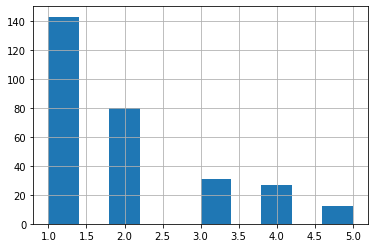

In [ ]:
# 점수별 빈도수
df['star'].hist()

In [ ]:
# 전체 데이터와 결측치 확인
print(df.shape)
# df.isnull().sum()
df.info()

(293, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   star     293 non-null    int64 
 1   content  293 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


1    143
2     80
3     31
4     27
5     12
Name: star, dtype: int64


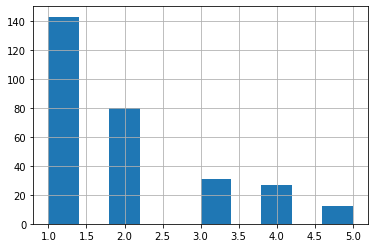

In [ ]:
# 점수별 현황
print(df['star'].value_counts())
df['star'].hist()

In [ ]:
# 점수를 기준으로 긍정(4,5)과 부정(1-3)으로 변환
def rating_to_label(rating):
    if rating > 2:
        return 1
    else:
        return 0
    
df['y'] = df['star'].apply(lambda x: rating_to_label(x))

In [ ]:
# 긍정 및 부정평가 댓글 수 
df["y"].value_counts()

0    223
1     70
Name: y, dtype: int64

In [ ]:
# 한글 불용어 사전 다운
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
# stopwords[:10]
# 형태 조정, 특별한 용어 추가 불용어 
stopwords=[x[0]  for x in stopwords]
stopwords[:10]

['휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해']

In [ ]:
# stopwords 추가 
news_stopwords = ['~','ㅠ']
for word in news_stopwords:
    stopwords.append(word)

In [ ]:
# df로 말뭉치로 만들기, 형태소 추출, stopwords 제거
import konlpy
# tagger = konlpy.tag.Mecab()
tagger = konlpy.tag.Okt()

tokens=[]
corpus =[]
# stopwords = ['(,', '것', '계','간의']

for i, sentence in enumerate(df['content']):
    para = tagger.nouns(sentence)
    para = [x for x in para if x not in stopwords] # 불용어 제거
    para = [x for x in para if len(x) > 1]
    tokens.append(para)
    corpus.append(' '.join(para))

print(corpus[:5])
print(tokens[:5])

['정전협정 가야 외교 실리 우린 평화 싱가폴 회담', '트럼프 장소 대화', '한반도 평화 노력 계속', '비핵화 완전 폐기', '실리 트럼프 가야']
[['정전협정', '가야', '외교', '실리', '우린', '평화', '싱가폴', '회담'], ['트럼프', '장소', '대화'], ['한반도', '평화', '노력', '계속'], ['비핵화', '완전', '폐기'], ['실리', '트럼프', '가야']]


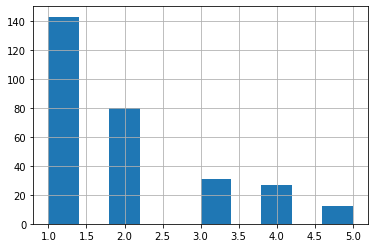

In [ ]:
# 점수별 빈도수
df['star'].hist()

In [ ]:
# 긍정 평가와 부정평가 토큰을 분리하여 저장 
print(df[:5])
print(df.loc[df['y']==0,][:5])
tokens_p, tokens_n = [],[]
for i, token in enumerate(tokens):
  # if i>5:
  #   break
  if df['y'].values[i]== 1:  # 주의 : df['y'][i] 값을 사용하면 기존 index가 참조되어서 값이 다름
    tokens_p.append(token)
  else :
    tokens_n.append(token)

print(tokens_p)
print(tokens_n)

   star                                            content  y
0     4  정전협정 가야지. 외교는 실리가 중요하지. 우린 평화를 원합니다.  싱가폴 회담 잘...  1
1     4         트럼프가 잘 알아서 하겠지. 장소가 중요하냐. 만나서 대화하는게 중요하지."  1
2     4           한반도 평화를 위한 노력이 계속되니 좋네요. 이젠 평화롭게 살아야죠!!"  1
3     3                                비핵화 완전 폐기전까지는 믿지말자"  1
4     1                 ㅋㅋㅋㅋ 실리? 죽고싶지 않으면 트럼프가 오라는데로 가야제?"  0
   star                                            content  y
4     1                 ㅋㅋㅋㅋ 실리? 죽고싶지 않으면 트럼프가 오라는데로 가야제?"  0
5     1  싱가폴로 장소가 결정된다는 사실은 트럼프가 노벨상에 대한 환상을 깨고 확실한 협상을...  0
6     1     김정은이 시진핑한테 물어보고 결정한듯. 주인님 이럴땐 어디로 할깝쇼? 노예민족답다"  0
8     2  1945년이래 우리가 평화를 원하지 않은적은 없다. 북괴의 적화통일야욕 돈뽑아내기 ...  0
9     1                                  종전선언은 판문점에서 하자^^"  0
[['정전협정', '가야', '외교', '실리', '우린', '평화', '싱가폴', '회담'], ['트럼프', '장소', '대화'], ['한반도', '평화', '노력', '계속'], ['비핵화', '완전', '폐기'], ['트럼프', '트럼프'], ['회담', '북한', '팔이', '짝퉁', '보수'], ['환영', '북미', '정상회담'], ['지선', '하루', '대박'], ['트럼프', '대북', '제재', '덕분', '문재인', '예전', '김대중

In [ ]:
# counter 함수에 넣기위한 전처리 : 토큰단위 리스트로
corpus_n, corpus_p = [], []
for token in tokens_p:
  corpus_p.append(' '.join(token))
for token in tokens_n:
  corpus_n.append(' '.join(token))
# 모든 리뷰를 긍정 부정 하나의 corpus로 합치기 
corpus_p1 = ' '.join(corpus_p).split()
corpus_n1 = ' '.join(corpus_n).split()
print(corpus_p1)

['정전협정', '가야', '외교', '실리', '우린', '평화', '싱가폴', '회담', '트럼프', '장소', '대화', '한반도', '평화', '노력', '계속', '비핵화', '완전', '폐기', '트럼프', '트럼프', '회담', '북한', '팔이', '짝퉁', '보수', '환영', '북미', '정상회담', '지선', '하루', '대박', '트럼프', '대북', '제재', '덕분', '문재인', '예전', '김대중', '노무현', '대통령', '대화', '트럼프', '기만', '변화', '마당', '우리나라', '국민', '재앙', '트럼프', '신뢰', '대통령', '임실', '판문점', '추천', '미국', '바보', '중국', '남한', '정부', '눈치', '협상', '필요', '영어', '싱가폴', '선호', '개인', '통일', '평화', '그냥', '전쟁', '서로', '신경', '남남', '트럼프', '화이팅', '김정은', '북한주민', '살기', '세계', '소통', '교류', '노력', '지금', '대북', '협상', '통일', '초석', '비핵화', '먼훗날', '결과', '기적', '하자', '대북', '억류', '먼저', '귀환', '조치', '문재인', '대통령', '모든', '국민', '지지', '선행', '국민', '프로', '진정', '의심', '가장', '중요', '포인트', '한가지', '판문점', '개최', '한국', '미국', '북한', '이익', '추구', '회담', '정말', '성과', '돌출', '판문점', '대통령', '한국', '추대', '트럼프', '역사', '스포트라이트', '전세계', '한국', '싱가포르', '회담', '미국', '북한', '회담', '한국', '회담', '비행기', '도착', '미대', '화이팅', '평화', '지나', '자유통일', '사치품', '공급원', '단백질', '공급원', '필수품', '공급원', '싱가폴', '진행', '통일', '종전', '선언', '정상', '도

In [ ]:
# 빈도 탐색
from collections import Counter
counter_p = Counter(corpus_p1)
counter_n = Counter(corpus_n1)
print(counter_p.most_common(10))
print(counter_n.most_common(10))

[('평화', 18), ('회담', 14), ('트럼프', 12), ('통일', 9), ('판문점', 8), ('북한', 7), ('대통령', 7), ('미국', 7), ('김정은', 7), ('한반도', 6)]
[('북한', 67), ('미국', 51), ('트럼프', 48), ('김정은', 44), ('평화', 37), ('회담', 37), ('문재인', 34), ('판문점', 25), ('폐기', 25), ('재앙', 21)]


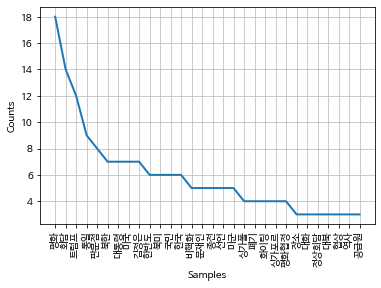

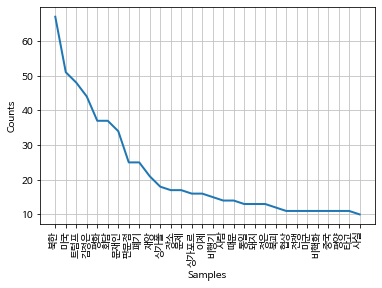

In [ ]:
# nltk 라이브러리 활용
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(corpus_p1)
neg = nltk.Text(corpus_n1)
plt.rc('font', family='NanumBarunGothic') 

plt.figure(1)
pos.plot(30)

plt.figure(2)
neg.plot(30)
plt.show()

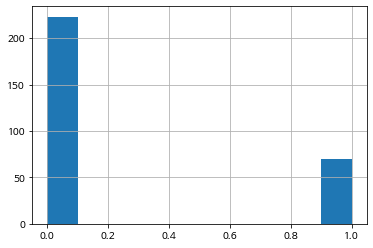

In [ ]:
df['y'].hist()

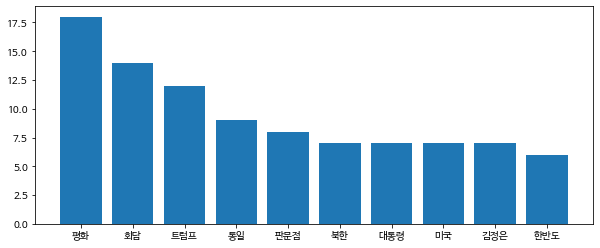

In [ ]:
top_10 = counter_p.most_common(10)

plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

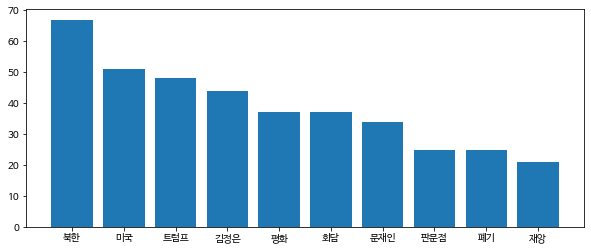

In [ ]:
top_10 = counter_n.most_common(10)

plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결
plt.bar(range(len(top_10)), [val[1] for val in top_10])
plt.xticks(range(len(top_10)), [val[0] for val in top_10])
plt.show()

In [ ]:
# DTM 구하기, corpus 문서단위 * 단어사전 3482개 매트릭스 
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import gensim
g_dictionary = gensim.corpora.Dictionary(tokens)
g_corpus = [g_dictionary.doc2bow(text) for text in tokens]
vector = CountVectorizer(vocabulary=g_dictionary.token2id)
dtm = vector.fit_transform(corpus).toarray()
col = g_dictionary.token2id.keys()
print(dtm.shape)
pd.DataFrame(dtm, columns=col)

(293, 1377)


,가야,실리,싱가폴,외교,우린,정전협정,평화,회담,대화,장소,트럼프,계속,노력,한반도,비핵화,완전,폐기,가능성,결정,기대,노벨상,대한,매우,방향,분위기,사실,의지,잔뜩,전혀,전환,협상,환상,김정은,깝쇼,노예,민족,시진핑,주인,거래,목적,...,국정원,내내,상디,온갖,인터넷,일베,자유당,전라도,쥐닭,랍니,보수당,균형,멸공,민족주의,반공,성격,역행,유독,인민지원군,진보,참전,흐름,난대,모의,행보,바다,신아,수장,파트너,그룹,악의,조중동,겸허,아무,이낙연,이재명,자문,조국,차기,차지
0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
289,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0


In [ ]:
# TF-IDF 변환
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer()
tf_idf = tfidf_vectorizer.fit_transform(dtm).toarray()
col = g_dictionary.token2id.keys()
print(tf_idf.shape)
pd.DataFrame(tf_idf, columns=col)

(293, 1377)


,가야,실리,싱가폴,외교,우린,정전협정,평화,회담,대화,장소,트럼프,계속,노력,한반도,비핵화,완전,폐기,가능성,결정,기대,노벨상,대한,매우,방향,분위기,사실,의지,잔뜩,전혀,전환,협상,환상,김정은,깝쇼,노예,민족,시진핑,주인,거래,목적,...,국정원,내내,상디,온갖,인터넷,일베,자유당,전라도,쥐닭,랍니,보수당,균형,멸공,민족주의,반공,성격,역행,유독,인민지원군,진보,참전,흐름,난대,모의,행보,바다,신아,수장,파트너,그룹,악의,조중동,겸허,아무,이낙연,이재명,자문,조국,차기,차지
0,0.408765,0.346190,0.280808,0.391546,0.408765,0.462252,0.221997,0.225506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.728402,0.549128,0.409742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318532,0.000000,0.000000,0.000000,0.000000,0.561808,0.618366,0.447809,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.522701,0.696485,0.491621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.709396,0.600799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
289,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.298016,0.000000,0.000000,0.280616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.610888,0.610888,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
# id_to_word
print(vector.vocabulary_)
id_to_word = {v: k for k, v in vector.vocabulary_.items()}
print(id_to_word)
print(id_to_word[10])

{'가야': 0, '실리': 1, '싱가폴': 2, '외교': 3, '우린': 4, '정전협정': 5, '평화': 6, '회담': 7, '대화': 8, '장소': 9, '트럼프': 10, '계속': 11, '노력': 12, '한반도': 13, '비핵화': 14, '완전': 15, '폐기': 16, '가능성': 17, '결정': 18, '기대': 19, '노벨상': 20, '대한': 21, '매우': 22, '방향': 23, '분위기': 24, '사실': 25, '의지': 26, '잔뜩': 27, '전혀': 28, '전환': 29, '협상': 30, '환상': 31, '김정은': 32, '깝쇼': 33, '노예': 34, '민족': 35, '시진핑': 36, '주인': 37, '거래': 38, '목적': 39, '북괴': 40, '세금': 41, '야욕': 42, '재앙': 43, '적화통일': 44, '선언': 45, '종전': 46, '판문점': 47, '하자': 48, '가족': 49, '그것': 50, '끼리': 51, '납북자': 52, '달라': 53, '라면': 54, '말로': 55, '먼저': 56, '모든': 57, '미국': 58, '사람': 59, '요구': 60, '이산': 61, '전제': 62, '진정': 63, '평화협정': 64, '거부권': 65, '결렬': 66, '그대로': 67, '김정일': 68, '낫다': 69, '다인': 70, '다한': 71, '모양새': 72, '미국인': 73, '보임': 74, '북한': 75, '사전': 76, '수용': 77, '오바마': 78, '전쟁': 79, '정함': 80, '조율': 81, '차이': 82, '항복': 83, '거리': 84, '껄떡': 85, '때문': 86, '려고': 87, '문재인': 88, '세계': 89, '싱가포르': 90, '위함': 91, '이유': 92, '장난': 93, '장단': 94, '절대': 95, '친북': 96, '한가지': 97, '갑

(-0.5, 899.5, 899.5, -0.5)

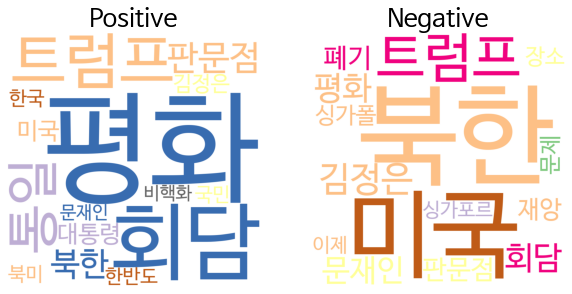

In [ ]:
# 워드크라우딩
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

wordcloud = WordCloud(
    font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',    
    background_color='white',                             
    colormap = 'Accent_r',                                
    width = 900,
    height = 900
)

p_tokens = dict(counter_p.most_common(15)) 
n_tokens = dict(counter_n.most_common(15))

fig = plt.figure(figsize=(10, 10))

axis1 = fig.add_subplot(1, 2, 1)
positive_words = wordcloud.generate_from_frequencies(p_tokens)
plt.gca().imshow(positive_words)
plt.gca().set_title('Positive', fontsize = 25)
plt.gca().axis('off')

axis2 = fig.add_subplot(1, 2, 2)
negative_words = wordcloud.generate_from_frequencies(n_tokens)
plt.gca().imshow(negative_words)
plt.gca().set_title('Negative', fontsize = 25)
plt.gca().axis('off')

In [ ]:
import seaborn as sns

In [ ]:
# 원천 데이터 데이터 프레임  
df.head()

,star,content,y
0,4,정전협정 가야지. 외교는 실리가 중요하지. 우린 평화를 원합니다. 싱가폴 회담 잘...,1
1,4,"트럼프가 잘 알아서 하겠지. 장소가 중요하냐. 만나서 대화하는게 중요하지.""",1
2,4,"한반도 평화를 위한 노력이 계속되니 좋네요. 이젠 평화롭게 살아야죠!!""",1
3,3,"비핵화 완전 폐기전까지는 믿지말자""",1
4,1,"ㅋㅋㅋㅋ 실리? 죽고싶지 않으면 트럼프가 오라는데로 가야제?""",0


In [ ]:
# 긍정 및 부정평가 댓글 수 
df["y"].value_counts()

0    223
1     70
Name: y, dtype: int64

In [ ]:
# data 로 종합 데이터 형성 
X = tf_idf
y=df['y']
data = pd.concat([y,pd.DataFrame(X)], axis=1)
data

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376
0,1,0.408765,0.346190,0.280808,0.391546,0.408765,0.462252,0.221997,0.225506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.728402,0.549128,0.409742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318532,0.000000,0.000000,0.000000,0.000000,0.561808,0.618366,0.447809,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.522701,0.696485,0.491621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0.709396,0.600799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168057,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
289,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.298016,0.000000,0.000000,0.280616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.610888,0.610888,0.000000,0.00

In [ ]:
# 전체 데이터를 train 데이터 70%, test 데이터 30%로 분리
from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(data, test_size = 0.3, random_state=256)
train_df.head()

,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376
182,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.56853,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.392817,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.401039,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.256562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.373440,0.0,0.0,0.087909,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,1,0.0,0.496163,0.0,0.561168,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247,0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 데이터 설정 맞추기 
x_train = train_df.drop(['y'], axis=1)
y_train = train_df['y']
x_test = test_df.drop(['y'], axis=1)
y_test = test_df['y']

In [ ]:
# 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
# classification result for test set
a1 = accuracy_score(y_test, y_pred)
p1 = precision_score(y_test, y_pred)
r1 =recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
print('accuracy: %.2f' % a1 )
print('precision: %.2f' % p1)
print('recall: %.2f' % r1)
print('F1: %.2f' % f1)

accuracy: 0.80
precision: 0.00
recall: 0.00
F1: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


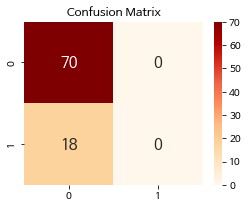

In [ ]:
# confusion matrix, 데이터 불균형에 의한 과적합 

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#sampling 재조정
df['y'].value_counts()

0    223
1     70
Name: y, dtype: int64

In [ ]:
# under-sampling 방법으로 불균현 해소 
positive_random_idx = df[df['y']==1].sample(70, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(70, random_state=12).index.tolist()

In [ ]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
x_train.shape, y_train.shape

((105, 1377), (105,))

In [ ]:
x_test.shape, y_test.shape

((35, 1377), (35,))

In [ ]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [ ]:
# classification result for test set
a2 = accuracy_score(y_test, y_pred)
p2 = precision_score(y_test, y_pred)
r2 =recall_score(y_test, y_pred)
f2= f1_score(y_test, y_pred)
print('accuracy: %.2f' % a2 )
print('precision: %.2f' % p2)
print('recall: %.2f' % r2)
print('F1: %.2f' % f2)

accuracy: 0.60
precision: 0.90
recall: 0.41
F1: 0.56


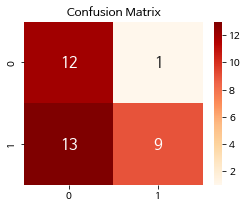

In [ ]:
# 개선된 confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 분류 정확도 test_result 
pd.options.display.float_format = '{:.2f}'.format
tr1 = pd.DataFrame([a1,p1,r1,f1])
tr2 = pd.DataFrame([a2,p2,r2,f2])

test_result = pd.concat([tr1.T, tr2.T], axis=0)
test_result.columns=['Accuracy(정확도)', 'Precision(정밀도)', 'Recall(재현율)', 'F1']
test_result.index = ['1차 Imbalance Data', '2차 Under-sampling']
test_result

,Accuracy(정확도),Precision(정밀도),Recall(재현율),F1
1차 Imbalance Data,0.80,0.00,0.00,0.00
2차 Under-sampling,0.60,0.90,0.41,0.56


In [ ]:
# 긍정/부정 키워드 추출 긍 / 부정 키워드를 추출 coeficient를 시각화
lr2.coef_

array([[0.        , 0.04517193, 0.48215152, ..., 0.        , 0.        ,
        0.        ]])

<BarContainer object of 1377 artists>

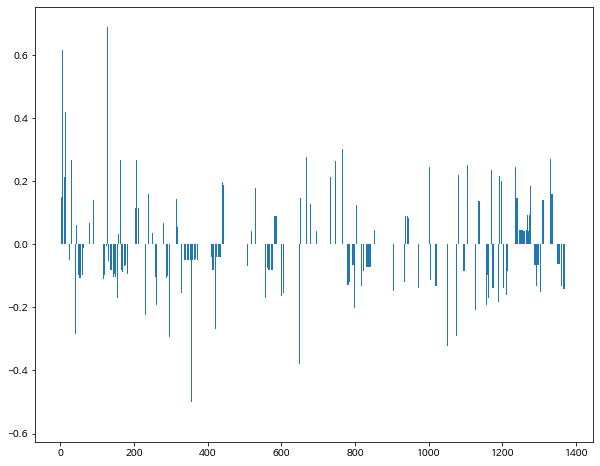

In [ ]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [ ]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(0.6887922118550589, 128), (0.6749108440524803, 160), (0.6141668061423465, 6), (0.49971426903394145, 490), (0.4821515230693432, 2)]
[(-0.40759882444772183, 897), (-0.4235741104280719, 43), (-0.45863337749891675, 153), (-0.4985454914968305, 356), (-0.5633080508356556, 75)]


In [ ]:
# 일부 중요 원소들 단어사전 확인
print('긍정리뷰 키워드: ', id_to_word[128],id_to_word[160]) 
print('부정리뷰 키워드: ', id_to_word[897],id_to_word[153]) 

긍정리뷰 키워드:  통일 북미
부정리뷰 키워드:  빨갱이 이제


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(0.6887922118550589, 128),
 (0.6749108440524803, 160),
 (0.6141668061423465, 6),
 (0.49971426903394145, 490),
 (0.4821515230693432, 2),
 (0.45692310862083296, 10),
 (0.4437540990250535, 1168),
 (0.42233743835552245, 208),
 (0.41831576103135876, 14),
 (0.4154058787831858, 363),
 (0.4092528670699391, 12),
 (0.4037933305594908, 8),
 (0.38430232278917165, 677),
 (0.3822504400285512, 1169),
 (0.3811561306931529, 45),
 (0.37800338942759587, 609),
 (0.35969473786761574, 1071),
 (0.3561690757227049, 7),
 (0.3473668749462205, 13),
 (0.3472360467944408, 217),
 (0.33445517619637344, 46),
 (0.3151258657075405, 1187),
 (0.3072546273694087, 268),
 (0.30588352477207537, 1114),
 (0.30159703990206366, 766),
 (0.30064488614242146, 134),
 (0.3002071504804613, 16),
 (0.29417084459522447, 984),
 (0.28202146463115174, 748),
 (0.2774390713632314, 162),
 (0.2767463359524697, 668),
 (0.2767463359524697, 667),
 (0.2701521110006569, 1330),
 (0.2665478227334711, 207),
 (0.26605174810887094, 165),
 (0.26605174810

In [ ]:
#  index를 단어로 변환하여 "긍정 키워드 리스트"와 "부정 키워드 리스트"의 Top 20 단어를 출력
invert_index_vectorizer = id_to_word

In [ ]:
pos_top_word=[] 
pos_top_score=[]
for coef in coef_pos_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    pos_top_word.append(invert_index_vectorizer[coef[1]])
    pos_top_score.append(coef[0])

통일 0.6887922118550589
북미 0.6749108440524803
평화 0.6141668061423465
화이팅 0.49971426903394145
싱가폴 0.4821515230693432
트럼프 0.45692310862083296
초이스 0.4437540990250535
대통령 0.42233743835552245
비핵화 0.41831576103135876
정상 0.4154058787831858


In [ ]:
neg_top_word=[] 
neg_top_score=[]

for coef in coef_neg_index[:10]:
    print(invert_index_vectorizer[coef[1]], coef[0])
    neg_top_word.append(invert_index_vectorizer[coef[1]])
    neg_top_score.append(coef[0])

북한 -0.5633080508356556
암살 -0.4985454914968305
이제 -0.45863337749891675
재앙 -0.4235741104280719
빨갱이 -0.40759882444772183
패싱 -0.3796420711253391
연합 -0.37737624180222484
김정은 -0.37518495652181005
갑인 -0.35954631827183475
개국 -0.35954631827183475


In [ ]:
pos_top_word.reverse()
pos_top_score.reverse()
top_word=neg_top_word+ pos_top_word
top_score = neg_top_score+ pos_top_score

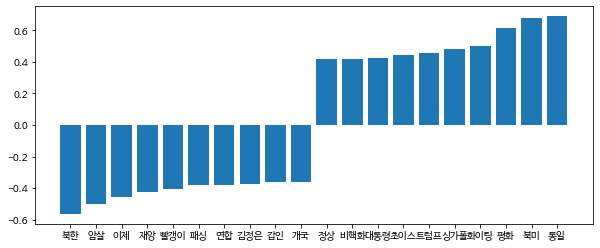

In [ ]:
plt.figure(figsize=(10, 4))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams["axes.unicode_minus"] = False # 한글 폰트 사용시 - 깨지는 문제 해결

plt.bar(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.bar(pos_top_word, pos_top_score, label = "긍정", color = 'g')

plt.bar(range(len(top_score)), top_score)
plt.xticks(range(len(top_word)), top_word)
plt.show()

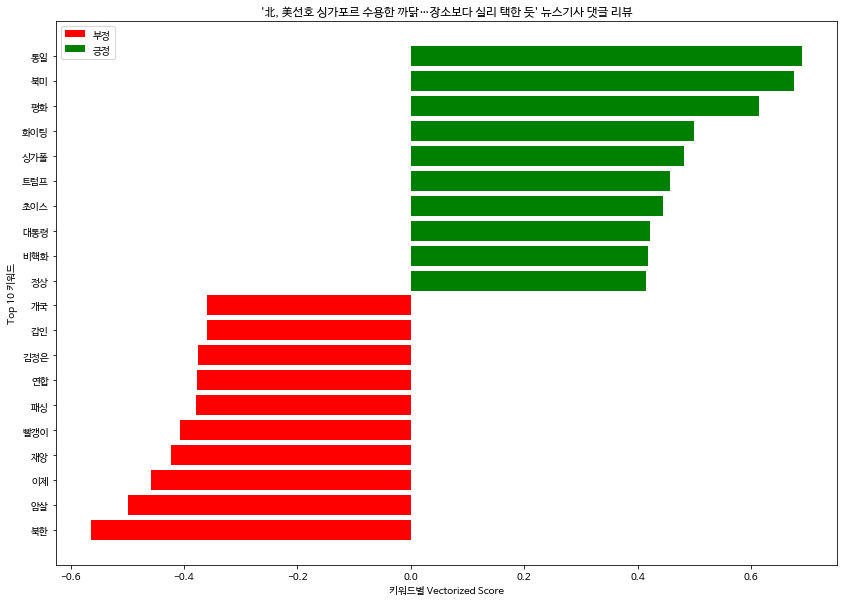

In [ ]:
# 감정분석 결과 시각화 
import matplotlib.pyplot as plt
plt.figure(figsize=[14, 10])
plt.barh(neg_top_word, neg_top_score, label = "부정", color = 'r')
plt.barh(pos_top_word, pos_top_score, label = "긍정", color = 'g')
plt.legend()
plt.xlabel('키워드별 Vectorized Score')
plt.ylabel('Top 10 키워드')
# Giving the tilte for the plot
plt.title("'北, 美선호 싱가포르 수용한 까닭…장소보다 실리 택한 듯' 뉴스기사 댓글 리뷰")
# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')
# Displaying the bar plot
plt.show()

Text(0.5, 0.98, '뉴스기사 댓글 리뷰')

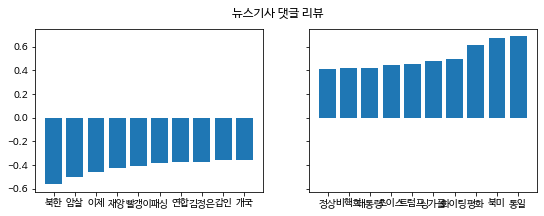

In [ ]:
# 약간 다르게 시각화 
import matplotlib.pyplot as plt

data1 = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names1 = list(data1.keys())
values1 = list(data1.values())

data2 = {'apple': 1, 'orange': 5, 'lemon': 15, 'lime': 25}
names2 = list(data2.keys())
values2 = list(data2.values())

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].bar(neg_top_word, neg_top_score)
axs[1].bar(pos_top_word, pos_top_score)
fig.suptitle('뉴스기사 댓글 리뷰')